<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Gathering-data" data-toc-modified-id="Gathering-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gathering data</a></span><ul class="toc-item"><li><span><a href="#Twitter-archive-file" data-toc-modified-id="Twitter-archive-file-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Twitter archive file</a></span></li><li><span><a href="#Tweet-image-prediction" data-toc-modified-id="Tweet-image-prediction-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Tweet image prediction</a></span></li><li><span><a href="#Twitter-API-File" data-toc-modified-id="Twitter-API-File-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Twitter API File</a></span></li></ul></li><li><span><a href="#Assessing-data" data-toc-modified-id="Assessing-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assessing data</a></span><ul class="toc-item"><li><span><a href="#Assess:-twitter-archive" data-toc-modified-id="Assess:-twitter-archive-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Assess: twitter archive</a></span></li><li><span><a href="#Assess:-Image-Predictions" data-toc-modified-id="Assess:-Image-Predictions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Assess: Image Predictions</a></span></li><li><span><a href="#Assess:-Twitter-API-Data" data-toc-modified-id="Assess:-Twitter-API-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Assess: Twitter API Data</a></span></li></ul></li><li><span><a href="#Cleaning-Data" data-toc-modified-id="Cleaning-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning Data</a></span><ul class="toc-item"><li><span><a href="#Clean:-Twitter-Archive-Data" data-toc-modified-id="Clean:-Twitter-Archive-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clean: Twitter Archive Data</a></span></li><li><span><a href="#Clean:-Image-Predictions-Data" data-toc-modified-id="Clean:-Image-Predictions-Data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Clean: Image Predictions Data</a></span></li><li><span><a href="#Clean:-Twitter-API-Data" data-toc-modified-id="Clean:-Twitter-API-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Clean: Twitter API Data</a></span></li></ul></li><li><span><a href="#Storing-Data" data-toc-modified-id="Storing-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Storing Data</a></span></li><li><span><a href="#Analyzing-and-Visualizing-Data" data-toc-modified-id="Analyzing-and-Visualizing-Data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyzing and Visualizing Data</a></span></li></ul></div>

# Introduction

this project is about rating dogs

and in this project we are goning to gather data from different sources and in different formats then assess the data we gathered and clean the data then store,analyze and visualize our data

# Gathering data
## Twitter archive file

downloaded from Udacity resources

In [1]:
# Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import tweepy
import json
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# pandas settings
pd.set_option('display.max_colwidth', None)

In [2]:
# load twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# use tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)
# display few lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


## Tweet image prediction

In [3]:
# URL downloaded programatically 
# get file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# load image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# use tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# display few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API File

In [ ]:
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '***********'
consumer_secret = '**********'
access_token = '***********'
access_secret = '*************'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)

In [5]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                        'favorites': fav_count,
                       'retweets': retweet_count,
                       'followers': user_count})
        
twitter_api = pd.DataFrame(df_list)
# use tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# display few lines
twitter_api.head()

,favorites,retweets,followers
tweet_id,,,
892420643555336193,39467,8853,3200889
892177421306343426,33819,6514,3200889
891815181378084864,25461,4328,3200889
891689557279858688,42908,8964,3200889
891327558926688256,41048,9774,3200889


# Assessing data

Assess data visually and programmatically using pandas for quality and tidiness issues.

## Assess: twitter archive

In [6]:
# display sample of data
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pupper only appears through the hole of a Funyun. Much like Phineas, this one is also mysterious af. 10/10 https://t.co/SQsEBWxPyG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675654983680/photo/1,10,10,None,None,None,pupper,None
693993230313091072,NaN,NaN,2016-02-01 03:04:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",These lil fellas are the best of friends. 12/10 for both. 1 like = 1 friend (vid by @CassieBrookee15) https://t.co/gzRghPC61H,NaN,NaN,NaN,https://vine.co/v/i5ETazP5hrm,12,10,None,None,None,None,None
829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mia. She already knows she's a good dog. You don't have to tell her. 12/10 would probably tell her anyway https://t.co/xeudgDXmTU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396166877184/photo/1,12,10,Mia,None,None,None,None
705898680587526145,NaN,NaN,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Max. He's a Fallopian Cephalopuff. Eyes are magical af. Lil dandruff problem. No big deal 10/10 would still pet https://t.co/c67nUjwmFs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/705898680587526145/photo/1,https://twitter.com/dog_rates/status/705898680587526145/photo/1",10,10,Max,None,None,None,None
683834909291606017,NaN,NaN,2016-01-04 02:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a faulty pupper. Might need to replace batteries. Try turning off &amp; back on again. 9/10 would still pet https://t.co/O1E4AtHVxO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683834909291606017/video/1,9,10,None,None,None,pupper,None


In [7]:
# print a summary of a DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [8]:
# check if ids are unique
twitter_archive.index.is_unique

True

In [9]:
# check number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [10]:
# check number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [11]:
# check name of dog
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
               ... 
JD                1
Dutch             1
Jersey            1
unacceptable      1
Superpup          1
Name: name, Length: 957, dtype: int64

In [12]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [13]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [14]:
# check rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
# check ratings with denominator greather than 10
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [16]:
# check rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
# check for any float ratings in the text column
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [18]:
# check expanded urls
twitter_archive[twitter_archive.expanded_urls.str.startswith(
    ('https://twitter.com', 'http://twitter.com',
     'https://vine.co'), na=False)].sample(3)[['text', 'expanded_urls']]

,text,expanded_urls
tweet_id,,
718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1
770069151037685760,Say hello to Carbon. This is his first time swimming. He's having a h*ckin blast. 10/10 we should all be this happy https://t.co/mADHGenzFS,https://twitter.com/dog_rates/status/770069151037685760/photo/1
670374371102445568,Meet Daisy. She's rebellious. Full of teen angst. Thought her food should be evenly dispersed around the room. 12/10 https://t.co/8yzgYzP94K,https://twitter.com/dog_rates/status/670374371102445568/photo/1


In [19]:
# check for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na=False)].expanded_urls.count()

639

     Quality Issues in twitter_archive

1- Delete columns that won't be used for analysis.

2- The timestamp has an incorrect datatype - is an object, should be DateTime.

3- some of the gathered tweets are replies and should be removed.

4- some of the gathered tweets are retweets.

5- some dogs have more than one category assigned.

6- Correct denominators other than 10.

7- float ratings have been incorrectly read from the text of tweet.

8- we have 639 expanded urls which contain more than one url address.

    Tidiness Issues in twitter_archive

1- Dog classification (doggo, floofer, pupper or puppo) should be in one column.


## Assess: Image Predictions

In [20]:
# display sample of data
image_prediction.sample(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
741743634094141440,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,1,Labrador_retriever,0.786089,True,flat-coated_retriever,0.048652,True,Chesapeake_Bay_retriever,0.034693,True
890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
687102708889812993,https://pbs.twimg.com/media/CYkURJjW8AEamoI.jpg,1,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False
684914660081053696,https://pbs.twimg.com/media/CYFOP6cWEAAWp-k.jpg,1,shopping_cart,0.460950,False,chow,0.261288,True,Labrador_retriever,0.074194,True
683849932751646720,https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg,1,hog,0.458855,False,Mexican_hairless,0.164906,True,wild_boar,0.111700,False
744995568523612160,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True
805207613751304193,https://pbs.twimg.com/media/CyysDQlVIAAYgrl.jpg,1,Pembroke,0.244705,True,Rhodesian_ridgeback,0.180461,True,Cardigan,0.094664,True
666073100786774016,https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg,1,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
808501579447930884,https://pbs.twimg.com/media/Czhf4XtVQAAIqpd.jpg,2,Airedale,0.454239,True,cocker_spaniel,0.219323,True,Irish_terrier,0.093193,True


In [21]:
# print a summary of a DataFrame
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [22]:
# Check jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [23]:
# check jpg_url to confirm if it contains only jpg and png images
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [24]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
# check 1st prediction
image_prediction.p1.sample(3)

tweet_id
672594978741354496    Great_Pyrenees
758355060040593408          Pembroke
709042156699303936            hotdog
Name: p1, dtype: object

In [26]:
# check dog predictions
image_prediction.p1_dog.count()

2075

    Quality Issues in Image Predictions

1- the dataset has 2075 entries, while twitter archive dataset has 2356 entries.

2- column names are confusing and do not give much information about the content.

3- dog breeds contain underscores, and have different case formatting.

4- only 2075 images have been classified as dog images for top prediction.

5- 66 jpg_url duplicates.

    Tidiness Issues in Image Predictions

1- dataset should be merged with the twitter archive dataset.

## Assess: Twitter API Data

In [27]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets,followers
tweet_id,,,
832757312314028032,18423,4127,3200800
829878982036299777,0,5757,3200892
777641927919427584,0,4947,3200902


In [28]:
# print a summary of a DataFrame
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
 2   followers  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


In [29]:
# check if ids are unique
twitter_archive.index.is_unique

True

     Quality Issues in Twitter API Data
    
1- twitter archive dataset has 2356 entries, while twitter API data has 2354.

    Tidiness Issues in Twitter API Data

1- dataset should be merged with the twitter archive dataset.

# Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

## Clean: Twitter Archive Data

In [30]:
# create a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [31]:
# display sample of data
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af https://t.co/3Bbba7y8Xe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675769573376/photo/1,9,10,Calvin,0,0,0,0,0
694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He's a Bisquick Taj Mapaw. Too many people are touching him. It is doing him a discomfort. 10/10 https://t.co/CJJpjTMzPQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863685980160/photo/1,10,10,Archie,0,0,0,0,0
675820929667219457,NaN,NaN,2015-12-12 23:34:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a handful of sleepy puppers. All look unaware of their surroundings. Lousy guard dogs. Still cute tho 11/10s https://t.co/lyXX3v5j4s,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675820929667219457/photo/1,11,10,None,0,0,0,0,0
714962719905021952,NaN,NaN,2016-03-29 23:49:30 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Just in case anyone's having a bad day. 12/10 would bounce with https://t.co/T9sgP9ttnQ,NaN,NaN,NaN,https://vine.co/v/inVtemLt9tE,12,10,None,0,0,0,0,0
756303284449767430,NaN,NaN,2016-07-22 01:42:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pwease accept dis rose on behalf of dog. 11/10 https://t.co/az5BVcIV5I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756303284449767430/photo/1,11,10,None,0,0,0,0,0


In [32]:
print(sum(twitter_archive_clean.retweeted_status_id.value_counts()))

181


In [33]:
print(sum(twitter_archive_clean.in_reply_to_status_id.value_counts()))

78


In [34]:
# drop retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

In [35]:
#TEST
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull()]

In [37]:
print(sum(twitter_archive_clean.in_reply_to_status_id.value_counts()))

0


In [38]:
# display all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

In [39]:
# drop unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

In [40]:
# test by the shape of dataframe
twitter_archive_clean.shape

(2097, 12)

In [41]:
# test by displaying cleaned dataset
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
787717603741622272,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tonks. She is a service puppo. Can hear a caterpillar hiccup from 7 miles away. 13/10 would follow anywhere https://t.co/i622ZbWkUp,"https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1,https://twitter.com/dog_rates/status/787717603741622272/photo/1",13,10,Tonks,0,0,0,1,1
810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,0,0,0,0,0
670822709593571328,2015-11-29 04:32:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can't do better than this lol. 10/10 for the owner https://t.co/yrqGyMZhW6,https://twitter.com/dog_rates/status/670822709593571328/photo/1,10,10,None,0,0,0,0,0


In [42]:
# display sample of dataframe
twitter_archive_clean.head(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,0,0,0,0,0
892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,0,0,0,0,0
891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,0,0,0,0,0


In [43]:
# read dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index,
                                                         'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()

# drop old columns
twitter_archive_clean.drop(['puppo', 'pupper', 'doggo', 'floofer'],
                           axis=1,
                           inplace=True)

In [44]:
# Test
# display sample of fixed data
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
677557565589463040,2015-12-17 18:34:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Reckless pupper here. Not even looking at road. Absolute menace. No regard for fellow pupper lives. 10/10 still cute https://t.co/96IBkOYB7j,https://twitter.com/dog_rates/status/677557565589463040/photo/1,10,10,None,1,Pupper
781251288990355457,2016-09-28 21:56:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He just got yelled at for going 46 in a 45. Churlish af. 11/10 would still pet so well https://t.co/xIYsa6LPA4,"https://twitter.com/dog_rates/status/781251288990355457/photo/1,https://twitter.com/dog_rates/status/781251288990355457/photo/1",11,10,Oakley,0,NaN
698262614669991936,2016-02-12 21:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Franklin. He's a yoga master. Trying to get rid of those rolls. Dedicated af. 11/10 keep it up pup https://t.co/S712MJXulD,https://twitter.com/dog_rates/status/698262614669991936/photo/1,11,10,Franklin,0,NaN


In [45]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

In [46]:
# Test
# display dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2097 non-null   datetime64[ns, UTC]
 1   source              2097 non-null   object             
 2   text                2097 non-null   object             
 3   expanded_urls       2094 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   number_categories   2097 non-null   int64              
 8   dog_type            374 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 243.8+ KB


In [47]:
# Disply a sample before correction
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10,27
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10,5
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75


In [48]:
# convert both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [49]:
# display sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10.0,13.50
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10.0,11.27
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10.0,9.75


In [50]:
# display sample of data with denominator greater than 10
twitter_archive_clean.loc[twitter_archive.rating_denominator > 10][['text','rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
tweet_id,,,
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70.0,84.0
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150.0,165.0
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11.0,9.0
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170.0,204.0
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20.0,4.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90.0,99.0
710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [51]:
# fix rating manually for tweets for which rating was read incorrectly
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [52]:
# add normalized rating
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [53]:
# Test
# display sample of data with the new column
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
695314793360662529,This is Colin. He really likes green beans. It's tearing his family apart. 10/10 please pray for Colin https://t.co/ioFy0cmK03,10.0,10.0,1.0
666837028449972224,My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10 https://t.co/xYGdBrMS9h,10.0,3.0,0.3
696894894812565505,These two pirates crashed their ship and don't know what to do now. Very irresponsible of them. Both 9/10 https://t.co/RJvUjgGH5z,10.0,9.0,0.9
710269109699739648,The squad is back for St. Patrick's Day! ☘ 💚\n13/10 for all https://t.co/OcCDb2bng5,10.0,13.0,1.3
810254108431155201,"This is Gus. He likes to be close to you, which is good because you want to be close to Gus. 12/10 would boop then pet https://t.co/DrsrQkEfnb",10.0,12.0,1.2


In [54]:
# fix expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    
# Test
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
756303284449767430,2016-07-22 01:42:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pwease accept dis rose on behalf of dog. 11/10 https://t.co/az5BVcIV5I,https://twitter.com/dog_rates/status/756303284449767430,11.0,10.0,None,0.0,NaN,1.1
739932936087216128,2016-06-06 21:32:13+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,https://twitter.com/dog_rates/status/739932936087216128,10.0,10.0,Rorie,0.0,NaN,1.0
666804364988780544,2015-11-18 02:25:23+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,https://twitter.com/dog_rates/status/666804364988780544,8.0,10.0,Jockson,0.0,NaN,0.8


 ## Clean: Image Predictions Data

In [55]:
# create a copy of dataset
image_prediction_clean = image_prediction.copy()

In [56]:
# display sample of data
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True
692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
670727704916926465,https://pbs.twimg.com/media/CU7nSZEW4AA6r5u.jpg,1,wood_rabbit,0.368562,False,tabby,0.309675,False,Egyptian_cat,0.154914,False


In [57]:
# display current labels
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [58]:
# change labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [59]:
# display new labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

In [60]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# remove underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

In [61]:
# display sample of changes
image_prediction_clean[dog_breed_cols].sample(5)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
672884426393653248,Tusker,Warthog,Water Buffalo
742423170473463808,Pug,Brabancon Griffon,French Bulldog
711968124745228288,Espresso,Coffee Mug,Cup
860924035999428608,Envelope,Oscilloscope,Paper Towel
790277117346975746,Labrador Retriever,Great Dane,Curly-Coated Retriever


In [62]:
#disply jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

In [63]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

#TEST
sum(image_prediction_clean['image_url'].duplicated())

0

In [64]:
# build function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# apply function to dataset
# create new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(
    lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# drop old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# drop rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

In [65]:
# Test
# display sample of cleaned dataset
image_prediction_clean.sample(3)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
681654059175129088,https://pbs.twimg.com/media/CXW4wGHWsAE_eBD.jpg,1,Pomeranian,0.800538
829141528400556032,https://pbs.twimg.com/media/C4GzztSWAAA_qi4.jpg,2,Golden Retriever,0.573140
667176164155375616,https://pbs.twimg.com/media/CUJJLtWWsAE-go5.jpg,1,Soft-Coated Wheaten Terrier,0.318981


## Clean: Twitter API Data

In [66]:
# display sample of data
twitter_api.sample(3)

,favorites,retweets,followers
tweet_id,,,
671182547775299584,1193,378,3201008
689993469801164801,1618,518,3200858
868639477480148993,0,2240,3200891


# Storing Data

In [67]:
# join datasets
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean,twitter_api])

In [68]:
# display new dataset
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets,followers
tweet_id,,,,,,,,,,,,,,,,,
846153765933735936,2017-03-27 00:15:53+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Vixen. He really likes bananas. Steals them when he thinks nobody's watching. 13/10 opportunistic af https://t.co/a0CkS5ExFR,https://twitter.com/dog_rates/status/846153765933735936,13.0,10.0,Vixen,0.0,NaN,1.3,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,Giant Schnauzer,0.346468,34394,10226,3200891
755110668769038337,2016-07-18 18:43:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Watson. He trust falls on command. 13/10 it's elementary... (IG: wat.ki) https://t.co/goX3jewkYN,https://twitter.com/dog_rates/status/755110668769038337,13.0,10.0,Watson,0.0,NaN,1.3,https://pbs.twimg.com/ext_tw_video_thumb/755110610942169088/pu/img/3-INz45pSRMkzOEF.jpg,1,Labrador Retriever,0.708974,23446,12621,3200943
739485634323156992,2016-06-05 15:54:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO,https://twitter.com/dog_rates/status/739485634323156992,6.0,10.0,Kyle,0.0,NaN,0.6,https://pbs.twimg.com/media/CkMuP7SWkAAD-2R.jpg,2,Walker Hound,0.640256,7887,3309,3200943


In [69]:
#Store the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

In [70]:
# display sample of data
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets,followers
tweet_id,,,,,,,,,,,,,,,,,
758854675097526272,2016-07-29 02:40:28+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW",https://twitter.com/dog_rates/status/758854675097526272,11.0,10.0,Lilli,0.0,NaN,1.1,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,Old English Sheepdog,0.023791,3904,1027,3200908
667495797102141441,2015-11-20 00:12:54+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af https://t.co/5NhPV8E45i,https://twitter.com/dog_rates/status/667495797102141441,9.0,10.0,Philippe,0.0,NaN,0.9,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,565,294,3201016
713411074226274305,2016-03-25 17:03:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see an extremely rare Bearded Floofmallow. Only a few left in the wild. 11/10 would pet with a purpose https://t.co/jVJJKlPbvq,https://twitter.com/dog_rates/status/713411074226274305,11.0,10.0,None,0.0,NaN,1.1,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great Pyrenees,0.720337,4802,1440,3200947


In [71]:
# display basic data summary
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets,followers
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1.606000e+03
mean,11.301233,10.453923,0.158780,1.079954,1.214819,0.552006,8652.456413,2570.235367,3.200945e+06
std,7.370575,6.380563,0.377326,0.188065,0.575127,0.299731,11756.635460,4324.387457,4.430794e+01
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000,3.200799e+06
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.305453,2093.500000,622.250000,3.200900e+06
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550914,4166.000000,1368.000000,3.200947e+06
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.824912,10929.000000,3014.000000,3.200954e+06
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000,3.201018e+06


In [72]:
# Display the number for each dog's breed 
df['breed_predicted'].value_counts()

Golden Retriever        141
Labrador Retriever      101
Pembroke                 93
Chihuahua                86
Pug                      60
                       ... 
Silky Terrier             1
Japanese Spaniel          1
Scotch Terrier            1
Irish Wolfhound           1
Bouvier Des Flandres      1
Name: breed_predicted, Length: 113, dtype: int64

In [73]:
# horizontal bar plot function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):

    plt.figure(figsize=(8, 5))

    bar_list = plt.barh(x, y, color="#760545")

    plt.title(title, fontsize=17)

    plt.xlabel(xlabel, fontsize=15)

    plt.ylabel(ylabel, fontsize=15)

    return plt.show()

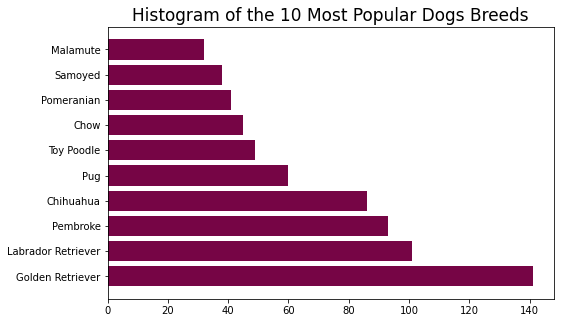

In [74]:
# plot 10 most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

In [75]:
df_dog_type_mean = df.groupby('breed_predicted').mean()

In [76]:
df_dog_type_mean.head()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets,followers
breed_predicted,,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000,3.200896e+06
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500,3.200956e+06
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125,3.200929e+06
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000,3.200920e+06
Australian Terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000,3.200920e+06


In [77]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.850000
Walker Hound                   0.900000
Scotch Terrier                 0.900000
                                 ...   
Border Terrier                 1.214286
Irish Setter                   1.233333
Briard                         1.233333
Saluki                         1.250000
Bouvier Des Flandres           1.300000
Name: rating, Length: 113, dtype: float64

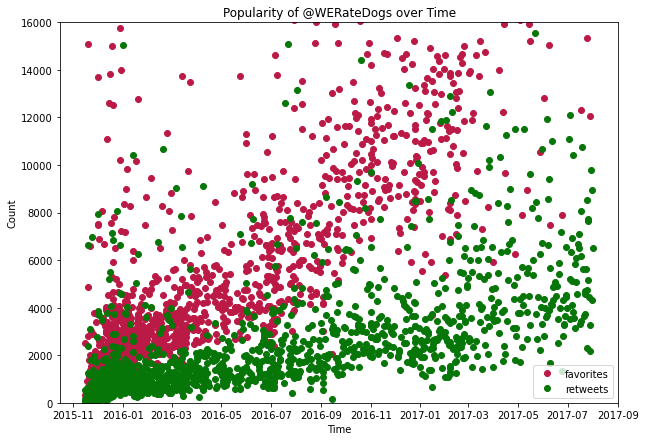

In [78]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#BB1A46")
ax.plot_date(d,df.retweets, color="#077609")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend(['favorites','retweets'])

In [79]:
df.dog_type.value_counts()

Pupper     181
Doggo       61
Puppo       25
Floofer      8
Name: dog_type, dtype: int64

In [80]:
# bar plot function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):

    plt.figure(figsize=(9, 6))

    bar_list = plt.bar(x, y, color="#760545", width=width)

    plt.title(title, fontsize=18)

    plt.xlabel(xlabel, fontsize=15)

    plt.ylabel(ylabel, fontsize=15)

    return plt.show()

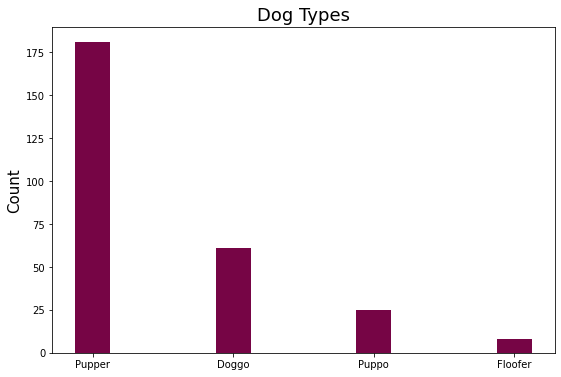

In [81]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25, 
         title="Dog Types", 
         ylabel="Count")